# Crack the Code - Session 6 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
baby_names = pd.read_csv(url)
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


###1. Delete the column 'Unnamed: 0' and 'Id' and count the number of males and females in the dataset. Visualize it using a bar plot

In [ ]:
del baby_names['Unnamed: 0']
del baby_names['Id']
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [ ]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

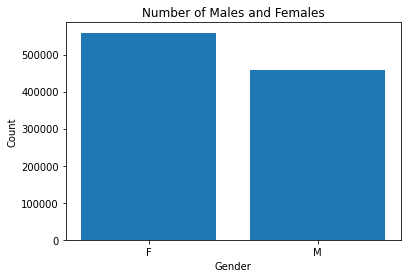

In [ ]:
x = list(baby_names['Gender'].unique())
y = list(baby_names['Gender'].value_counts().values)

plt.bar(x,y)
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### 2. Group the dataset by name and display them based on their frequency in descending order

In [ ]:
baby_names.groupby("Name").sum().sort_values("Count", ascending = False)['Count'].head()

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

### 3. What was the most popular name every year?

In [ ]:
baby_names.set_index('Name').head()

,Unnamed: 0,Id,Year,Gender,State,Count
Name,,,,,,
Emma,11349,11350,2004,F,AK,62
Madison,11350,11351,2004,F,AK,48
Hannah,11351,11352,2004,F,AK,46
Grace,11352,11353,2004,F,AK,44
Emily,11353,11354,2004,F,AK,41


In [ ]:
baby_names.set_index('Name').groupby("Year").Count.idxmax()

Year
2004      Daniel
2005      Daniel
2006      Daniel
2007      Daniel
2008      Daniel
2009      Daniel
2010    Isabella
2011      Sophia
2012      Sophia
2013      Sophia
2014      Sophia
Name: Count, dtype: object

In [ ]:
years = list(baby_names['Year'].unique())
for i in years:
  print(baby_names[baby_names['Year'] == i].sort_values('Count', ascending = False).head(1))

          Name  Year Gender State  Count
107416  Daniel  2004      M    CA   4167
          Name  Year Gender State  Count
110097  Daniel  2005      M    CA   3914
          Name  Year Gender State  Count
112872  Daniel  2006      M    CA   3826
          Name  Year Gender State  Count
115739  Daniel  2007      M    CA   3865
          Name  Year Gender State  Count
118707  Daniel  2008      M    CA   3749
          Name  Year Gender State  Count
121618  Daniel  2009      M    CA   3391
           Name  Year Gender State  Count
87307  Isabella  2010      F    CA   3364
         Name  Year Gender State  Count
91401  Sophia  2011      F    CA   3562
         Name  Year Gender State  Count
95393  Sophia  2012      F    CA   3634
         Name  Year Gender State  Count
99481  Sophia  2013      F    CA   3451
          Name  Year Gender State  Count
103432  Sophia  2014      F    CA   3162


### 4. Next find the most popular name for every year for each gender.

In [ ]:
baby_names.set_index('Name').groupby(["Year", 'Gender']).Count.idxmax()

Year  Gender
2004  F            Emily
      M           Daniel
2005  F            Emily
      M           Daniel
2006  F            Emily
      M           Daniel
2007  F            Emily
      M           Daniel
2008  F         Isabella
      M           Daniel
2009  F         Isabella
      M           Daniel
2010  F         Isabella
      M            Jacob
2011  F           Sophia
      M            Jacob
2012  F           Sophia
      M            Jacob
2013  F           Sophia
      M            Jacob
2014  F           Sophia
      M             Noah
Name: Count, dtype: object

### 5. Create a function that takes in the gender and the year as arguments and prints out the top 10 least popular names in that year for specified gender

In [ ]:
def least_pop(gender, year):
  return baby_names[(baby_names['Year'] == year) & (baby_names['Gender'] == gender)].sort_values('Count', ascending = True).head(10)

least_pop('M', 2014)

,Name,Year,Gender,State,Count
1016394,Waylon,2014,M,WY,5
228783,Malique,2014,M,FL,5
228782,Malcom,2014,M,FL,5
228781,Maikel,2014,M,FL,5
228780,Luiz,2014,M,FL,5
228779,Luigi,2014,M,FL,5
228778,Louie,2014,M,FL,5
228777,Leif,2014,M,FL,5
228776,Ledger,2014,M,FL,5
228775,Lazarus,2014,M,FL,5


In [ ]:
x = lambda gender,year:baby_names[(baby_names['Year'] == year) & (baby_names['Gender'] == gender)].sort_values('Count', ascending = True).head(10)
x('M', 2014)

,Name,Year,Gender,State,Count
1016394,Waylon,2014,M,WY,5
228783,Malique,2014,M,FL,5
228782,Malcom,2014,M,FL,5
228781,Maikel,2014,M,FL,5
228780,Luiz,2014,M,FL,5
228779,Luigi,2014,M,FL,5
228778,Louie,2014,M,FL,5
228777,Leif,2014,M,FL,5
228776,Ledger,2014,M,FL,5
228775,Lazarus,2014,M,FL,5
